# Movie Data Pre-Processing


*   STEP 1 QUICK EXPLORATION & FIRST CLEANING
*   STEP 2 DATA PROCESSING

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


## STEP 1 // QUICK EXPLORATION & FIRST CLEANING

In [ ]:
import pandas as pd
import numpy as np
import ast
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CS230/Datasets/movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [ ]:
print("Length: ", len(data.id))

Length:  45466


In [ ]:
data = data[data.adult == 'False']
data['overview'] = data['overview'].fillna("No")
data = data[data.overview != "No"]
data = data[data.original_language == "en"]

In [ ]:
data = data.drop(['adult', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title','production_companies', 'production_countries' ], axis = 1)
data = data.drop(['release_date', 'runtime', 'spoken_languages', 'status', 'video' ], axis = 1)
data = data.drop(['revenue', 'budget'], axis = 1)
data.head(2)

,genres,overview,popularity,poster_path,tagline,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,NaN,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [ ]:
data['genres'] = data['genres'].fillna('[]').apply(ast.literal_eval)
data['genres'] = data['genres'].apply(lambda x: [i['name'].lower() for i in x] if isinstance(x, list) else [])

In [ ]:
data = data.drop(['tagline', 'poster_path', 'popularity'], axis = 1)
data = data[data.overview != 'No overview found.']

# Now let's see what we're left with:
data.head(2)

,genres,overview,title,vote_average,vote_count
0,"[animation, comedy, family]","Led by Woody, Andy's toys live happily in his ...",Toy Story,7.7,5415.0
1,"[adventure, fantasy, family]",When siblings Judy and Peter discover an encha...,Jumanji,6.9,2413.0


In [ ]:
print("Length: ", len(data.overview))

Length:  32131


## STEP 2 // PRE-PROCESSING

In [ ]:
#Let's import a few tools and add a few features
from tensorflow.keras.preprocessing.text import text_to_word_sequence 
data['length'] = [len(text_to_word_sequence(str(x))) for x in data.overview] #Number of words in Synopsis
data['num_genres'] = [len(x) for x in data.genres] #Number of genres for each movie

In [ ]:
#Number of words
print("average len:", np.mean(data.length))
print("min len:", np.min(data.length))
print("max len:", np.max(data.length))

average len: 53.83246708785908
min len: 0
max len: 187


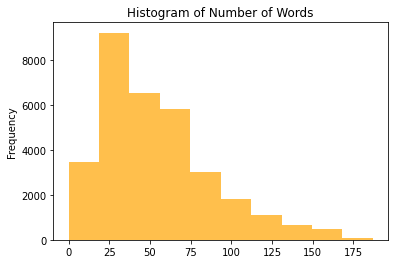

In [ ]:
data['length'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Histogram of Number of Words')
plt.show()

In [ ]:
#Genres
print("average number of genres:", np.mean(data.num_genres))
print("min:", np.min(data.num_genres))
print("max:", np.max(data.num_genres))

average number of genres: 2.047524197815194
min: 0
max: 8


In [ ]:
#Now let's filter to keep only movies with more than 10 words / less that 125 words in their synopsis
print("Before: ", len(data.length))
data = data[data.length>10]
data = data[data.length<125]
print("After: ", len(data.length))

Before:  32131
After:  30049


In [ ]:
#Explore all the genres...
allgenres = [item for x in data.genres for item in x]
allgenres = set(allgenres)
allgenres

{'action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'foreign',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science fiction',
 'thriller',
 'tv movie',
 'war',
 'western'}

In [ ]:
#Encoding the genres into Binary features...
data['action'] = [1 if 'action' in x else 0 for x in data.genres]
data['adventure'] = [1 if  'adventure' in x else 0 for x in data.genres]
data['animation'] = [1 if  'animation' in x else 0 for x in data.genres]
data['comedy'] = [1 if  'comedy' in x else 0 for x in data.genres]
data['crime'] = [1 if  'crime' in x  else 0 for x in data.genres]
data['documentary'] = [1 if  'documentary' in x  else 0 for x in data.genres]
data['drama'] = [1 if  'drama' in x else 0 for x in data.genres]
data['family'] = [1 if  'family' in x else 0 for x in data.genres]
data['fantasy'] = [1 if  'fantasy' in x else 0 for x in data.genres]
data['foreign'] = [1 if  'foreign' in x else 0 for x in data.genres]
data['history'] = [1 if  'history' in x  else 0 for x in data.genres]
data['horror'] = [1 if  'horror' in x  else 0 for x in data.genres]
data['music'] = [1 if  'music' in x else 0 for x in data.genres]
data['mystery'] = [1 if  'mystery' in x else 0 for x in data.genres]
data['romance'] = [1 if  'romance' in x else 0 for x in data.genres]
data['sci_fi'] = [1 if 'science fiction' in x else 0 for x in data.genres]
data['thriller'] = [1 if 'thriller' in x  else 0 for x in data.genres]
data['tv_movie'] = [1 if 'tv movie' in x  else 0 for x in data.genres]
data['war'] = [1 if 'war' in x  else 0 for x in data.genres]
data['western'] = [1 if 'western' in x  else 0 for x in data.genres]


In [ ]:
data.head(3)

,genres,overview,title,vote_average,vote_count,length,num_genres,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,foreign,history,horror,music,mystery,romance,sci_fi,thriller,tv_movie,war,western
0,"[animation, comedy, family]","Led by Woody, Andy's toys live happily in his ...",Toy Story,7.7,5415.0,50,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,"[adventure, fantasy, family]",When siblings Judy and Peter discover an encha...,Jumanji,6.9,2413.0,65,3,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,"[romance, comedy]",A family wedding reignites the ancient feud be...,Grumpier Old Men,6.5,92.0,57,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
import string
data['words'] = [str(x).lower() for x in data.overview]

In [ ]:
# Filtering for English only...
!pip install langdetect
from langdetect import detect
data['language'] = [detect(str(x)) for x in data.overview]
data = data[data.language == 'en']

     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=a7bbda988f1bdb530543a613354738ac96f3ace513fec7cb1daac3dd1b809f72
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
#Removing rows with unusual/rare characters...
charlist = set('лносцगचटपमरष®')
char = ('\u200b','\xad','\xa0','\x92', '\n',  'à','á','â','ã','ä', 'å','ç','è', 'ë','í','î','ï', 'ñ', 'ò','ó','ô','ö','ø','ú', 'ü','ğ','ı','ō')

data['check1'] = [1 if any((c in charlist) for c in s) else 0 for s in data.words]
data['check2'] = [1 if any((c in char) for c in s) else 0 for s in data.words]

print("Before: ", len(data.title))
data = data[data.check1 == 0]
data = data[data.check2 == 0]
print("After: ", len(data.title))

data = data.drop(['check1', 'check2', 'language'], axis = 1)

Before:  29981
After:  29638


In [ ]:
data['success'] = [1 if x>6.5 else 0 for x in data.vote_average]

In [ ]:
#Overview...
print("Number of movies: ", len(data.title))
print("Number of success movies", np.sum(data.success))
print("Average vote: ", np.round(np.mean(data.vote_average)))
print("Average synopsis length: ", np.round(np.mean(data.length)))

Number of movies:  29638
Number of success movies 8377
Average vote:  6.0
Average synopsis length:  50.0


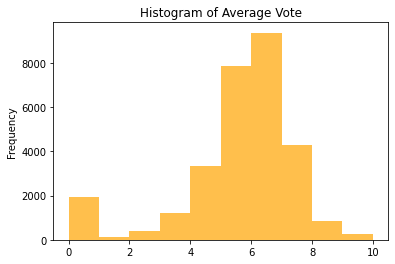

In [ ]:
# HISTOGRAM / VOTES

data['vote_average'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Histogram of Average Vote')

plt.show()

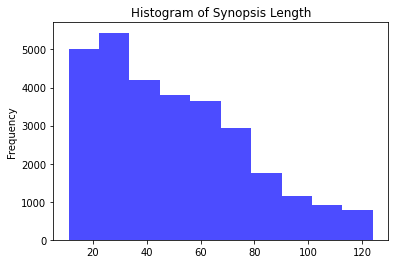

In [ ]:
# HISTOGRAM / LENGTH

data['length'].plot(kind='hist', alpha=0.7, color='blue')
plt.title('Histogram of Synopsis Length')

plt.show()

In [ ]:
# GENRES
allgenres.discard("science fiction")
allgenres.discard("tv movie")
allgenres.add('sci_fi')
allgenres.add("tv_movie")
genresum = [data[x].sum() for x in allgenres]


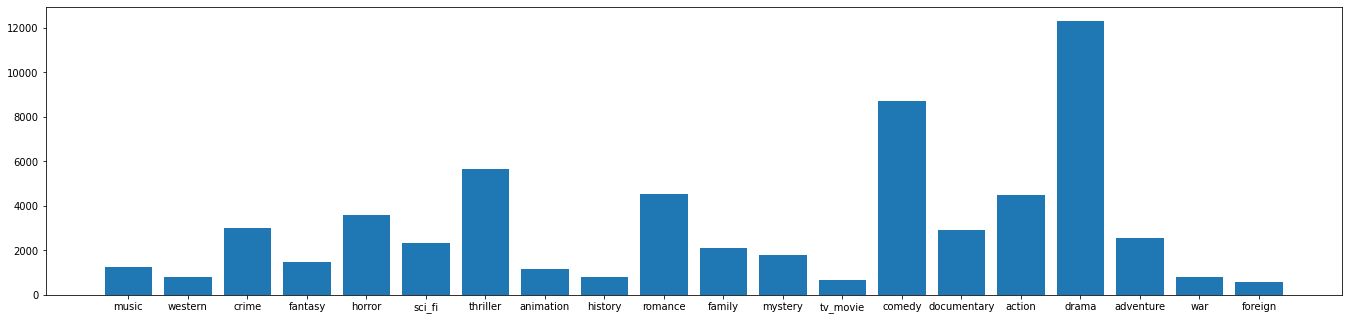

In [ ]:
# HISTOGRAM / GENRES
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(list(allgenres),genresum)
plt.show()

In [ ]:
# WORDS WITH *SOME* PUNCTUATION...
pun = set('.')
data['overview_stop'] = [''.join(' .' if l in pun else l for l in x) for x in data.overview]

In [ ]:
print(data.overview[0])
print(data.overview_stop[0])

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene . Afraid of losing his place in Andy's heart, Woody plots against Buzz . But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences .


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input, Dense, Concatenate, Masking, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

In [ ]:
# Tokenizing / Create a Tokenizer object

liststrings = list(data.overview_stop)
size_dict = 9000
tokenizer = Tokenizer(num_words= size_dict, 
                      filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n', 
                      split=' ', 
                      oov_token='<UNK>',
                      document_count=0)


tokenizer.fit_on_texts(liststrings) 
seqtokens = tokenizer.texts_to_sequences(liststrings)

tokenizer_config = tokenizer.get_config()
dict_counts = tokenizer_config['word_counts']
dict_index = tokenizer_config['word_index'] 

In [ ]:
sequnk = [[1 if x ==1 else 0 for x in s] for s in seqtokens]
data['count_unk'] = [np.sum(x) for x in sequnk]
data['freq_unk'] = [float(np.sum(x)/len(x)) for x in sequnk]

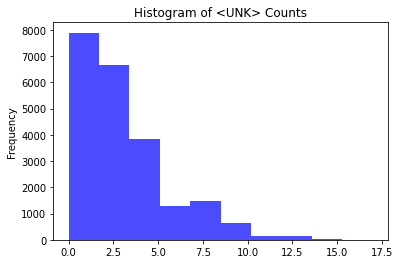

In [ ]:
# HISTOGRAM / UNK COUNT

data['count_unk'].plot(kind='hist', alpha=0.7, color='blue')
plt.title('Histogram of <UNK> Counts')

plt.show()

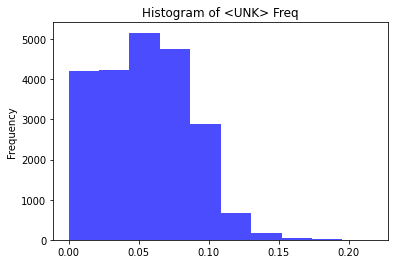

In [ ]:
# HISTOGRAM / UNK FREQ

data['freq_unk'].plot(kind='hist', alpha=0.7, color='blue')
plt.title('Histogram of <UNK> Freq')

plt.show()

In [ ]:
print("Before: ", len(data.title))
data = data[data.freq_unk<0.1]
print("After: ", len(data.title))


Before:  22127
After:  20691


In [ ]:
# Saving...
data.to_csv('/content/drive/My Drive/CS230/finaldata.csv', index = False)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CS230/finaldata.csv')

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.02, random_state=42)

In [ ]:
# Saving train & test...
data_train.to_csv('/content/drive/My Drive/CS230/finaldata_train.csv', index = False)
data_test.to_csv('/content/drive/My Drive/CS230/finaldata_test.csv', index = False)